In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import keras
tf.config.run_functions_eagerly(True)

In [83]:
# import data
train = pd.read_csv(r'C:\Users\Lenny\Documents\Github\Kaggle\DigitRecognizer\train.csv')
test = pd.read_csv(r'C:\Users\Lenny\Documents\Github\Kaggle\DigitRecognizer\test.csv')
sample = pd.read_csv(r'C:\Users\Lenny\Documents\Github\Kaggle\DigitRecognizer\sample_submission.csv')

In [85]:
labels = []
ims = []
test_ims = []
for i, r in train.iterrows():
    labels.append(r['label'])
    ims.append(r.values[1:].reshape([28,28]) / 255)
for i, r in test.iterrows():
    test_ims.append(r.values.reshape([28,28]) / 255)

In [159]:
cnn = keras.Sequential()
cnn.add(keras.Input(shape=(28, 28, 1)))
cnn.add(keras.layers.Conv2D(8, (3, 3)))
cnn.add(keras.layers.SpatialDropout2D(0.1))
cnn.add(keras.layers.Conv2D(15, (3, 3)))
cnn.add(keras.layers.SpatialDropout2D(0.2))
cnn.add(keras.layers.MaxPooling2D((2,2), 1))
cnn.add(keras.layers.Conv2D(8, (3, 3)))
cnn.add(keras.layers.Conv2D(5, (5, 5), strides=3))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(100, activation='relu'))
cnn.add(keras.layers.Dense(20, activation='relu'))
cnn.add(keras.layers.Dense(10, activation='softmax'))
cnn.build()
cnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
    run_eagerly=True,
)

In [160]:
cnn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 spatial_dropout2d_8 (Spatia  (None, 26, 26, 8)        0         
 lDropout2D)                                                     
                                                                 
 conv2d_24 (Conv2D)          (None, 24, 24, 15)        1095      
                                                                 
 spatial_dropout2d_9 (Spatia  (None, 24, 24, 15)       0         
 lDropout2D)                                                     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 15)       0         
 2D)                                                             
                                                     

In [164]:
ims_array = np.expand_dims(np.array(ims), -1).astype(float)
labels_array = keras.utils.to_categorical(np.array(labels).reshape(-1, 1), 10)
test_ims_array = np.expand_dims(np.array(test_ims), -1).astype(float)

In [165]:
cnn.fit(ims_array, labels_array, batch_size = 24, epochs=20, validation_split = 0.1)

Epoch 1/20
1575/1575 [==============================] - 70s 45ms/step - loss: 0.0181 - binary_accuracy: 0.9949 - false_negatives_7: 1012.0000 - val_loss: 0.0196 - val_binary_accuracy: 0.9946 - val_false_negatives_7: 121.0000
Epoch 2/20
1575/1575 [==============================] - 64s 41ms/step - loss: 0.0156 - binary_accuracy: 0.9957 - false_negatives_7: 852.0000 - val_loss: 0.0206 - val_binary_accuracy: 0.9945 - val_false_negatives_7: 118.0000
Epoch 3/20
1575/1575 [==============================] - 60s 38ms/step - loss: 0.0132 - binary_accuracy: 0.9963 - false_negatives_7: 739.0000 - val_loss: 0.0169 - val_binary_accuracy: 0.9950 - val_false_negatives_7: 108.0000
Epoch 4/20
1575/1575 [==============================] - 67s 42ms/step - loss: 0.0120 - binary_accuracy: 0.9967 - false_negatives_7: 661.0000 - val_loss: 0.0158 - val_binary_accuracy: 0.9958 - val_false_negatives_7: 92.0000
Epoch 5/20
1575/1575 [==============================] - 64s 41ms/step - loss: 0.0112 - binary_accuracy: 

In [166]:
test_pred = cnn.predict(test_ims_array)
output = pd.DataFrame(
    data = pd.DataFrame(test_pred).apply(lambda x: x.index[x == max(x)].values[0], axis=1).reset_index().values,
    columns = ['ImageId', 'Label']
)
output['ImageId'] += 1
output.to_csv(r'C:\Users\Lenny\Documents\Github\Kaggle\DigitRecognizer\submission.csv', index=False)

875/875 [==============================] - 8s 9ms/step


In [167]:
pd.DataFrame(test_pred)

,0,1,2,3,4,5,6,7,8,9
0,3.902535e-21,1.601965e-19,9.999999e-01,5.620385e-19,5.278879e-18,4.232041e-22,2.571791e-16,9.705720e-17,9.299144e-24,1.504804e-19
1,9.999999e-01,2.102408e-24,2.278451e-19,2.487799e-18,1.828096e-15,6.244486e-16,6.497917e-17,1.015503e-17,2.249083e-25,5.116026e-14
2,3.627764e-14,1.203020e-12,4.542296e-13,3.059360e-12,2.564306e-09,8.409263e-14,7.158211e-18,8.780325e-12,1.559278e-12,9.999999e-01
3,2.998783e-05,8.006889e-12,1.160627e-04,2.228400e-05,7.440720e-10,3.228841e-10,8.308739e-10,1.324716e-08,4.441839e-09,9.998317e-01
4,5.466557e-14,1.030054e-11,1.672427e-12,9.999999e-01,3.561679e-13,1.173845e-10,1.248722e-11,8.827329e-15,7.622349e-10,5.941318e-11
...,...,...,...,...,...,...,...,...,...,...
27995,8.619284e-17,4.315044e-17,1.572304e-21,6.056679e-17,1.076526e-12,5.934241e-14,2.329160e-24,5.262836e-17,8.187819e-19,9.999999e-01
27996,1.116354e-25,1.790316e-14,4.885112e-24,6.570674e-14,7.029636e-21,1.388055e-23,6.964134e-37,9.999999e-01,3.268174e-21,4.339571e-18
27997,9.546986e-30,6.682499e-19,1.271810e-28,9.999999e-01,5.502551e-22,8.800552e-18,5.629383e-24,6.238315e-25,1.383590e-20,8.124392e-16
27998,1.792615e-15,2.171466e-14,1.272429e-16,3.519746e-14,4.070094e-10,4.103980e-14,2.231850e-20,1.253629e-13,1.416593e-15,9.999999e-01


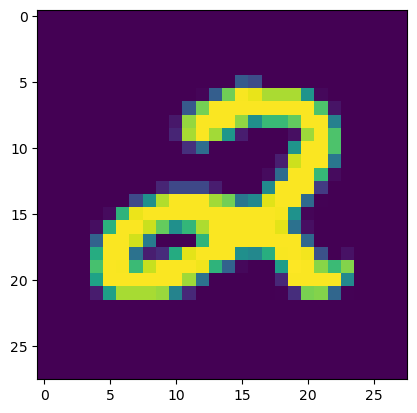

In [175]:
plt.imshow(test_ims[27999])

In [169]:
tt = pd.DataFrame(test_pred)
tt['max_p'] = tt.max(axis=1)


In [170]:
tt.sort_values('max_p', ascending=True)

,0,1,2,3,4,5,6,7,8,9,max_p
18626,1.551216e-10,2.892567e-01,2.557631e-10,5.271720e-08,1.130684e-01,7.926104e-07,6.802367e-14,1.509580e-01,2.756364e-01,1.710796e-01,0.289257
21930,1.216212e-02,1.643087e-01,2.334853e-01,3.363881e-01,7.164089e-03,1.077803e-03,5.787184e-03,1.281716e-01,6.198986e-03,1.052561e-01,0.336388
19470,1.995659e-13,8.180165e-06,1.220481e-12,2.450649e-08,3.441144e-01,2.974853e-01,2.428773e-12,1.931268e-03,4.204418e-03,3.522564e-01,0.352256
23874,1.208440e-09,1.860832e-02,1.571974e-02,3.122235e-05,2.953161e-01,3.687836e-01,2.164644e-01,8.507319e-02,1.525569e-07,3.263484e-06,0.368784
10338,3.605375e-03,1.943005e-07,3.563873e-01,2.580156e-01,1.167223e-03,3.272881e-03,2.244207e-03,4.291101e-06,9.040723e-07,3.753021e-01,0.375302
...,...,...,...,...,...,...,...,...,...,...,...
10047,3.556219e-18,9.999999e-01,1.929882e-15,1.348201e-15,1.281784e-15,4.467129e-15,5.432775e-14,2.812972e-13,3.559578e-11,1.512701e-10,1.000000
10046,2.856798e-15,2.258183e-14,1.534406e-21,3.720147e-10,7.568830e-11,9.999999e-01,1.621939e-10,2.088300e-16,3.078756e-10,4.885184e-10,1.000000
10045,2.651745e-26,3.063335e-20,5.123467e-29,1.262770e-28,9.999999e-01,4.653472e-21,1.445314e-26,2.142970e-21,4.552911e-21,1.837910e-19,1.000000
10057,2.198269e-22,2.555320e-18,9.999999e-01,2.202063e-22,8.312354e-18,7.246088e-21,8.599600e-12,1.017100e-16,8.448908e-22,5.063110e-18,1.000000
